In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows,cols,1)

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # Compile the Model
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.SGD(lr=0.1, momentum=0.0, decay=0.0), metrics=['accuracy'])

  return model

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 0.4221 - accuracy: 0.8833
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1679 - accuracy: 0.9507
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1172 - accuracy: 0.9655
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0926 - accuracy: 0.9715
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0784 - accuracy: 0.9762
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0691 - accuracy: 0.9795
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0623 - accuracy: 0.9812
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0567 - accuracy: 0.9831
Epoch 9/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0524 - accuracy: 0.9849
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0499 

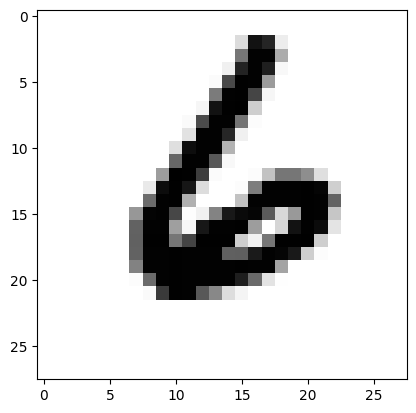

In [6]:
lenet = build_lenet(input_shape)

# We will be allowing 10 itterations to happen
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)

# Check Accuracy of the Model
loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())